In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

pd.options.display.max_colwidth = 400 #we used this in the NLP EDA Lab 5.02 and it I thought it makes sense to use it here, too.

In [25]:
df = pd.read_csv('data/data2022-06-25.csv')

In [26]:
back_up = df.copy()

In [27]:
df.head(1)

,created_utc,selftext,subreddit,title
0,1656160828,[removed],startrek,"I hope Strange New Worlds encourages a new generation to watch TOS, rekindling a love similar to the one us “old timers” have."


In [28]:
df.dtypes

created_utc     int64
selftext       object
subreddit      object
title          object
dtype: object

In [29]:
df.isnull().sum()

created_utc       0
selftext       2396
subreddit         0
title             0
dtype: int64

In [30]:
df['selftext'] = df['selftext'].fillna('')
df.isnull().sum()

created_utc    0
selftext       0
subreddit      0
title          0
dtype: int64

I referenced the NLP EDA Lab 5.02 for this code to add column and word counts

In [31]:
df['submission_length'] = 0
df['submission_word_count'] = 0
df['title_length'] = 0
df['title_word_count'] = 0
for i in range(len(df)):
    df.loc[i, 'submission_length'] = len(df.loc[i, 'selftext'])
for i in range(len(df)):
    df.loc[i, 'title_length'] = len(df.loc[i, 'title'])
for i in range(len(df)):
    df.loc[i, 'submission_word_count'] = len(df.loc[i,'selftext'].split())
for i in range(len(df)):
    df.loc[i, 'title_word_count'] = len(df.loc[i,'title'].split())
    
df.head()

,created_utc,selftext,subreddit,title,submission_length,submission_word_count,title_length,title_word_count
0,1656160828,[removed],startrek,"I hope Strange New Worlds encourages a new generation to watch TOS, rekindling a love similar to the one us “old timers” have.",9,1,126,23
1,1656148312,[removed],startrek,Dr. M'Benga issues,9,1,18,3
2,1656143958,[removed],startrek,The Star Trek: Enterprise theme song is the worst,9,1,49,9
3,1656137319,[removed],startrek,I think I have found evidence of time travel,9,1,44,9
4,1656135541,[removed],startrek,"Old Trek and new Trek, a question",9,1,33,7


In [39]:
df['subreddit'] = df['subreddit'].str.lower()
df[df['subreddit'] != 'startrek'].head(3)

,created_utc,selftext,subreddit,title,submission_length,submission_word_count,title_length,title_word_count
3584,1656181956,[removed],starwars,Am I really the only Star Wars fan that thinks Revenge Of The Sith is by far the weakest and most soulless movie of the Prequels?,9,1,129,26
3585,1656180963,[removed],starwars,Anyone who likes the last Jedi should not be allowed an opinion on this page,9,1,76,15
3586,1656177173,[removed],starwars,If you're a new Starwars fan welcome! This post isn't for you.,9,1,62,12


In [66]:
df.to_csv('data/cleaned_with_removed_posts.csv')

# Removed

'[removed]' interferes with my "submission_length" and "submission_word_count" analyses, so I explore that here before removing those rows.



Observations:

There are 3584 Star Trek posts in the data set, of which 39.29% are "[removed]"
There are 3490 Star Wars posts in the data set, of which 16.48% are "[removed]"
Star Trek posts are removed at a higher rate.

![Removal Rates Bar Chart](images/removal_rates.png "removal rates for 'startrek' and 'StarWars' subreddits")

NOTE: I referenced [this site](https://www.digitalocean.com/community/tutorials/markdown-markdown-images) and [this site](https://marinegeo.github.io/2018-08-10-adding-images-markdown/) to learn how to add images to markdown files.

I was curious to see if what words were appearing most frequently in the titles of these posts, so I vectorized them. I tried to remove only value neutral words. For example, the English stopwords list includes 'not', but it seems plausible that negative posts may be more likely to be removed, so I don't want to take 'not' out.

There was one word in the top 10 list for removed posts that was not in the top 10 list for all posts: `'picard'`. Picard is a new show that's aroused passionat feelings among both detractors and fans. It's logical that detractors might have flamed the show in a way that violated subreddit policies.

There were three words that appeared in the top 25 words for posts that were removed that were not in the top 25 for all words: `'snw', 'or', 'spoilers'`. 'Or' is arguably a word that should have come out for stop words. Otherwise, 'snw' is an abbreviation for the new Star Trek Show 'Strange New Worlds'. It's curious that these posts appear to be removed at a higher rate. It also seems logical that if a subreddit has a policy against spoilers or spoilers that aren't tagged properly, they're getting removed. If so, that would explain the word "spoilers" appearing there.

Looking at the top 50 words from both groups, these are the ones that appear on the removed but not on the general list: `'enterprise', 'watch', 'should', 'some', 'character', 'want', 'discovery'`. Enterprise and Discovery are both shows that arose passionate feelings among both fans and detractors: it seems logical that detractors might have flamed the shows in violation of subreddit policies and gotten removed. Looking at this list made me realize that `'snw', 'or', 'spoilers'`, which appear in the top 25 most used words in removed posts must appear in 26-50 of all posts, hence they don't appear here. That caused me to go back and look at the top 10 from each list.

**Overall, the rate at which specific Star Trek shows appear more frequently among removed posts than among posts in general, especially considering that the list includes Star Wars posts and especially considering that Star Trek posts are being removed more frequently than Star Wars posts suggests the possibility that either the rules for the two forums are quite different or that Star Trek subreddit posters are more likely to attack a show within the Star Trek universe than Star Wars subreddit posters are to attack a show within the Star Wars universe.**

I checked [the rules for the startrek subreddit](https://www.reddit.com/r/startrek/wiki/guidelines) and [the rules for the StarWars subreddit](https://www.reddit.com/r/StarWars/wiki/rules). Interestingly, the Star Wars rules were harder to find while the Star Trek ones were posted at the top of the page.

Subjectively, the Star Trek rules seem more attuned to interpersonal relationships (the first four are 'Be constructive', 'Be welcoming', 'Be honest', and 'Be nice')

I'm also curious to see if I can predict which posts were removed based on the title and what I learn from that, so I'm going to export a file with the removals to look at that in modeling. My plan is to do vectorization in the model building, so I've just exported the dataframe without vectorization.


[This stackoverflow answer](https://stackoverflow.com/a/48115401), which I've referenced before, helped me to understand how to pull out the keys and values from the value counts for the following work.

In [43]:
print(len(df[df['selftext'] == '[removed]']))
print('')
print(df[df['selftext'] == '[removed]']['subreddit'].value_counts())
print('')
values = df[df['selftext'] == '[removed]']['subreddit'].value_counts().keys().tolist()
counts = df[df['selftext'] == '[removed]']['subreddit'].value_counts().tolist()

print(f'Check that count totals are equal to thet total number of "[removed]" posts, {len(df[df["selftext"] == "[removed]"])}: {counts[0]} + {counts[1]} = {counts[0]+counts[1]}')
print('')
print(f'There are {len(df[df["subreddit"] == "startrek"])} Star Trek posts in the data set, of which {round((counts[0]/len(df[df["subreddit"] == "startrek"]))*100, 2)}% are "[removed]"')
print(f'There are {len(df[df["subreddit"] == "starwars"])} Star Wars posts in the data set, of which {round((counts[1]/len(df[df["subreddit"] == "starwars"]))*100, 2)}% are "[removed]"')


1983

startrek    1408
starwars     575
Name: subreddit, dtype: int64

Check that count totals are equal to thet total number of "[removed]" posts, 1983: 1408 + 575 = 1983

There are 3584 Star Trek posts in the data set, of which 39.29% are "[removed]"
There are 3490 Star Wars posts in the data set, of which 16.48% are "[removed]"


To help me add labels to the visualization below, I found [this site](https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/), which led me to the `plt.text()` function. I then looked up the documentation to better understand how to use it to get the labels I wanted.

''

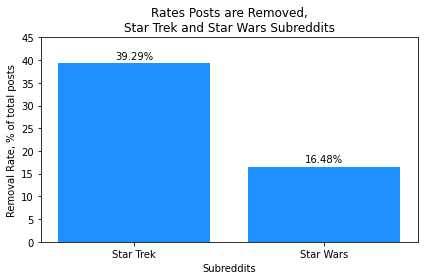

In [56]:
removal_rates = {
    'Star Trek': round((counts[0]/len(df[df["subreddit"] == "startrek"]))*100, 2),
    'Star Wars': round((counts[1]/len(df[df["subreddit"] == "starwars"]))*100, 2)
}
plt.title('Rates Posts are Removed,\nStar Trek and Star Wars Subreddits')
plt.xlabel('Subreddits')
plt.ylabel('Removal Rate, % of total posts')

plt.ylim(0, 45)
plt.bar(removal_rates.keys(), removal_rates.values(), color = 'dodgerblue')

plt.text(0, removal_rates['Star Trek']+1, str(removal_rates['Star Trek'])+'%', ha = 'center')
plt.text(1, removal_rates['Star Wars']+1, str(removal_rates['Star Wars'])+'%', ha = 'center')

plt.tight_layout()
plt.savefig('images/removal_rates.png')
;

In [63]:
#I referenced NLP 1 Lesson 5.01 to find the list of English stopwords
print(sorted((stopwords).words('english')))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shouldn't", 'so', 'some',

These are the words I'm removing from the stopwords list so I can see if they appear in the titles of removed posts: 'against', 'ain', 'am', 'and', 'are', 'aren', "aren't", 'be', 'been', 'being', 'but', 'can', 'couldn', 'did', 'didn', "didn't", 'do', 'does', 'doesn',"couldn't", "doesn't", 'doing', 'don', "don't", 'down', 'few', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having','he', 'her', 'hers', 'herself', 'him', 'himself', 'his','is', 'isn', "isn't", 'just',  'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'needn', "needn't", 'no', 'nor', 'not', 'off', 'on', 'only', 'or', 'out', 'over', 'same', 'shan', "shan't", 'she', "she's", "should've", 'shouldn', "shouldn't", 'should',  'so', 'some', 'too', 'under', 'until', 'up', 'very', 'was', 'wasn', "wasn't", 'were', 'weren', "weren't", 'will', 'won', "won't", 'wouldn', "wouldn't",

I've kept all verbs in the titles (i.e. taken them out of the stopwords list). For example, I kept 'is' because I want to keep contractions like "isn't", which is not value neutral. While it seems more likely 'is' will appear in a value neutral statement, that seems to be tilting the playing field if I remove it.

I also opted to remove gendered pronouns from the stopwords list. I'm curious to see if there are any patterns to the use of gendered pronouns.

In [70]:
neutral_stopwords = ['a', 'about', 'above', 'after', 'again', 'all', 'an', 'any', 'as', 'at', 'because', 'before', 'below',
                     'between', 'both', 'by', 'd', 'during', 'each', 'for', 'from',  'here',  'how', 'i', 'if', 'in', 'into', 'it', "it's", 'its', 'itself',
                     'll', 'm', 'ma', 'me','my', 'myself', 'now', 'o', 'of', 'once', 'other', 'our', 'ours', 'ourselves', 
                     'own', 're', 's',   'such', 't', 'than', 'that', "that'll", 'the', 'their',
                     'theirs', 'them', 'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 'through', 'to', 
                      've', 'we', 'what', 'when', 'where', 'which', 'while', 'who', 'whom', 'why', 'with', 
                     'y', 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves']

I referenced the NLP Lab 5.02 on EDA for help with getting the following code right.

In [75]:
cvec = CountVectorizer(stop_words = neutral_stopwords)
cvec.fit(df['title'])
vectorized = cvec.transform(df['title'])
vectorized.shape

(7074, 7920)

In [76]:
vectorized = pd.DataFrame(vectorized.todense(), columns = cvec.get_feature_names_out())
print(vectorized.shape)
type(vectorized)

(7074, 7920)


pandas.core.frame.DataFrame

In [84]:
with_removed_vectorized = pd.concat([df['selftext'], vectorized], axis = 1)
print(with_removed_vectorized.shape)
with_removed_vectorized.head()

(7074, 7921)


,selftext,00,000,01,010,01x06,02,02png,03,04,...,ليلة,مهذبة,نسخ,وليلة,एक,लचस,षक,ดท,ทางเข,าส
0,[removed],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,[removed],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,[removed],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,[removed],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,[removed],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
print('Number of removed posts in new dataframe:', len(with_removed_vectorized[with_removed_vectorized["selftext"] == "[removed]"]))
print('Sanity check. Number of removed posts from original dataframe:', len(df[df["selftext"] == "[removed]"]))
print('='*20)

top_10_removed = list(pd.Series(with_removed_vectorized[with_removed_vectorized['selftext'] =='[removed]'].drop(columns = ['selftext'])\
                           .sum().sort_values(ascending = False)).reset_index()[:11]['index'])
top_10_all = list(pd.Series(with_removed_vectorized.drop(columns = ['selftext'])\
                       .sum().sort_values(ascending = False)).reset_index()[:11]['index'])

print(f'The following words appear in the top 10 most used words in removed posts but not in the top 10 words for all posts {[word for word in top_10_removed if word not in top_10_all]}')
print('='*20)

top_25_removed = list(pd.Series(with_removed_vectorized[with_removed_vectorized['selftext'] =='[removed]'].drop(columns = ['selftext'])\
                           .sum().sort_values(ascending = False)).reset_index()[:26]['index'])
top_25_all = list(pd.Series(with_removed_vectorized.drop(columns = ['selftext'])\
                       .sum().sort_values(ascending = False)).reset_index()[:26]['index'])

print(f'The following words appear in the top 25 most used words in removed posts but not in the top 25 words for all posts {[word for word in top_25_removed if word not in top_25_all]}')
print('='*20)

top_50_removed = list(pd.Series(with_removed_vectorized[with_removed_vectorized['selftext'] =='[removed]'].drop(columns = ['selftext'])\
                           .sum().sort_values(ascending = False)).reset_index()[:51]['index'])
top_50_all = list(pd.Series(with_removed_vectorized.drop(columns = ['selftext'])\
                       .sum().sort_values(ascending = False)).reset_index()[:51]['index'])

print(f'The following words appear in the top 50 most used words in removed posts but not in the top 50 words for all posts {[word for word in top_50_removed if word not in top_50_all]}')


Number of removed posts in new dataframe: 1983
Sanity check. Number of removed posts from original dataframe: 1983
The following words appear in the top 10 most used words in removed posts but not in the top 10 words for all posts ['picard']
The following words appear in the top 25 most used words in removed posts but not in the top 25 words for all posts ['snw', 'or', 'spoilers']
The following words appear in the top 50 most used words in removed posts but not in the top 50 words for all posts ['enterprise', 'watch', 'should', 'some', 'character', 'want', 'discovery']
